In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Capstone/transactions_dataset.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date_order     datetime64[ns]
 1   date_invoice   datetime64[ns]
 2   product_id     category      
 3   client_id      category      
 4   sales_net      float32       
 5   quantity       int32         
 6   order_channel  category      
 7   branch_id      category      
dtypes: category(4), datetime64[ns](2), float32(1), int32(1)
memory usage: 2.1 GB


In [ ]:
df = df.drop(columns='date_invoice')

In [ ]:
df.head()

,date_order,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2376333,188502,155.443207,3,online,2732
1,2017-09-25,2520527,835089,16.394400,3,at the store,10279
2,2017-09-25,2536756,1977896,365.766235,21,online,6184
3,2017-09-25,3028673,598816,8.598780,201,at the store,4200
4,2017-09-25,203377,2086861,1093.374023,3,by phone,7051


# Total Sales

In [ ]:
df['period']=np.where(df['date_order']<='2018-09-22', 'P1718', 'P1819')
erase = df.query("date_order =='2017-09-22'")
df = df.drop(erase.index)

In [ ]:
total_sales = df.groupby(['period']).agg({'sales_net':'sum'}).reset_index()

In [ ]:
total_sales

,period,sales_net
0,P1718,4.579934e+09
1,P1819,4.787622e+09


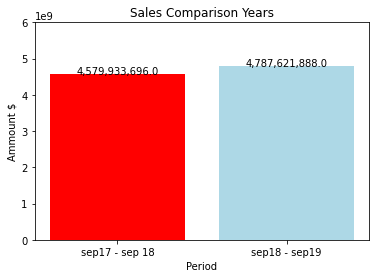

In [ ]:
first_year = total_sales.iloc[0,1]
second_year = total_sales.iloc[1,1]
sales = [first_year, second_year]
years = ['sep17 - sep 18', 'sep18 - sep19']
colors = ['#FF0000', '#ADD8E6']
for i in range(len(years)):
    plt.bar(years[i], sales[i], color=colors[i], label=sales[i])
    plt.text(i, sales[i]+500, f"{sales[i]:,}", ha='center')
plt.xlabel('Period')
plt.ylabel('Ammount $')
plt.title('Sales Comparison Years')
plt.ylim(0,6000000000)
plt.show()


# Transactions

In [ ]:
transactions = df[df['sales_net']>0]
total_transactions = df.groupby(['period']).agg({'sales_net':'count'}).reset_index()
total_transactions

,period,sales_net
0,P1718,31663508
1,P1819,31655785


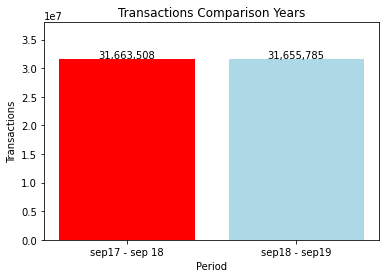

In [ ]:
first_year = total_transactions.iloc[0,1]
second_year = total_transactions.iloc[1,1]
transactions_1 = [first_year, second_year]
years = ['sep17 - sep 18', 'sep18 - sep19']
colors = ['#FF0000', '#ADD8E6']
for i in range(len(years)):
    plt.bar(years[i], transactions_1[i], color=colors[i], label=sales[i])
    plt.text(i, transactions_1[i]+500, f"{transactions_1[i]:,}", ha='center')
plt.xlabel('Period')
plt.ylabel('Transactions')
plt.title('Transactions Comparison Years')
plt.ylim(0,38000000)
plt.show()

# Average Ticket

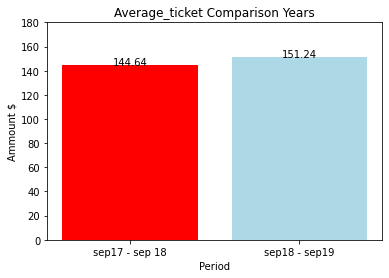

In [ ]:
average_ticket = pd.merge(total_sales,total_transactions,on='period')
average_ticket['average_ticket'] = average_ticket['sales_net_x']/average_ticket['sales_net_y']
average_ticket
first_year = round(average_ticket.iloc[0,3],2)
second_year = round(average_ticket.iloc[1,3],2)
first_year
average_ticket_1 = [first_year, second_year]
years = ['sep17 - sep 18', 'sep18 - sep19']
colors = ['#FF0000', '#ADD8E6']
for i in range(len(years)):
    plt.bar(years[i], average_ticket_1[i], color=colors[i], label=sales[i])
    plt.text(i, average_ticket_1[i], f"{average_ticket_1[i]:,}", ha='center')
plt.xlabel('Period')
plt.ylabel('Ammount $')
plt.ylim(0,180)
plt.title('Average_ticket Comparison Years')
plt.show()

# Channel Mix

In [ ]:
channel_mix=df.groupby(['order_channel','period']).agg({'sales_net':'sum'})

In [ ]:
channel_mix = channel_mix.sort_values(by=['period','sales_net'], ascending=False).reset_index()
channel_mix

,order_channel,period,sales_net
0,by phone,P1819,3.057902e+09
1,at the store,P1819,1.239778e+09
2,online,P1819,4.807561e+08
3,other,P1819,5.156742e+06
4,during the visit of a sales rep,P1819,4.029064e+06
5,by phone,P1718,2.972245e+09
6,at the store,P1718,1.210323e+09
7,online,P1718,3.902595e+08
8,other,P1718,3.692710e+06
9,during the visit of a sales rep,P1718,3.414087e+06


In [ ]:
channel_mix['%Mix'] = np.where(channel_mix['period']=='P1718', channel_mix['sales_net']/channel_mix[channel_mix['period']=='P1718']['sales_net'].sum()*100,
                       channel_mix['sales_net']/channel_mix[channel_mix['period']=='P1819']['sales_net'].sum()*100)
channel_mix

,order_channel,period,sales_net,%Mix
0,by phone,P1819,3.057902e+09,63.870995
1,at the store,P1819,1.239778e+09,25.895485
2,online,P1819,4.807561e+08,10.041648
3,other,P1819,5.156742e+06,0.107710
4,during the visit of a sales rep,P1819,4.029064e+06,0.084156
5,by phone,P1718,2.972245e+09,64.897118
6,at the store,P1718,1.210323e+09,26.426640
7,online,P1718,3.902595e+08,8.521073
8,other,P1718,3.692710e+06,0.080628
9,during the visit of a sales rep,P1718,3.414087e+06,0.074544


In [ ]:
val1 = np.array(channel_mix['%Mix'][channel_mix['period']=='P1718'])
val1[3]=val1[3]+val1[4]
val1 = val1[0:4]
val2 = np.array(channel_mix['%Mix'][channel_mix['period']=='P1819'])
val2[3]=val2[3]+val2[4]
val2 = val2[0:4]
labels = np.array(channel_mix['order_channel'][channel_mix['period']=='P1819'])
labels[4]='others'
labels=labels[0:4]
labels

array(['by phone', 'at the store', 'online', 'other'], dtype=object)

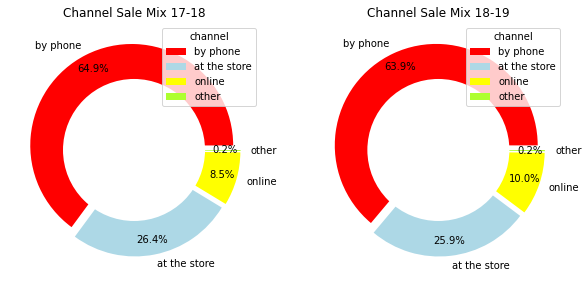

In [ ]:
# Setting labels for items in Chart
Employee = labels
plt.subplot(1,2,1)
# Setting size in Chart based on 
# given values
Salary = val1
# colors
colors = ['#FF0000', '#ADD8E6', '#FFFF00', 
          '#ADFF2F']
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
# Pie Chart
plt.pie(Salary, colors=colors, labels=Employee,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Channel Sale Mix 17-18')
# Displaying Chart
plt.legend(labels, loc = "upper right",title="channel")
plt.subplot(1,2,2)
# Setting size in Chart based on 
# given values
Salary = val2
# colors
colors = ['#FF0000', '#ADD8E6', '#FFFF00', 
          '#ADFF2F']
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
# Pie Chart
plt.pie(Salary, colors=colors, labels=Employee,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Channel Sale Mix 18-19')
# Displaying Chart
plt.legend(labels, loc = "upper right",title="channel")
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()


# Negative Transaction Quantity Queries

In [ ]:
negatives = df.query('sales_net<0')

In [ ]:
negatives = negatives.sort_values(by=['quantity','product_id'],ascending=False)

In [ ]:
negatives

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
40060508,2018-08-10,2018-12-31,1124849,1901320,-3013.936768,180001,by phone,903
45895390,2018-12-31,2019-03-12,1124849,1901320,-672.339722,180001,at the store,903
34679245,2018-08-28,2018-11-01,2184699,1445962,-736.004578,160001,by phone,8705
34693735,2018-08-28,2018-11-01,2184699,1445962,-736.004578,160001,by phone,8705
45196990,2018-11-01,2019-03-04,2184699,973569,-736.004578,160001,at the store,8705
...,...,...,...,...,...,...,...,...
43602737,2018-11-19,2019-02-11,1000204,1766746,-116.085602,3,at the store,8215
48874927,2018-11-29,2019-04-10,1000204,29960,-133.666794,3,at the store,995
50312060,2019-04-18,2019-04-25,1000204,2228415,-152.766006,3,at the store,9263
52377933,2018-11-05,2019-06-03,1000204,1747804,-95.468399,3,by phone,9870


In [ ]:
df.query('client_id == "1445962" & product_id == "2184699"').sort_values(by=['date_order'])

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
29545749,2018-08-28,2018-08-30,2184699,1445962,736.004578,160001,by phone,8705
29635537,2018-08-28,2018-08-30,2184699,1445962,736.004578,160001,by phone,8705
34679245,2018-08-28,2018-11-01,2184699,1445962,-736.004578,160001,by phone,8705
34693735,2018-08-28,2018-11-01,2184699,1445962,-736.004578,160001,by phone,8705


In [ ]:
df.query('client_id == "864026" & product_id == "246501"').sort_values(by=['date_order','quantity'],ascending=False)

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
63030801,2019-09-18,2019-09-30,246501,864026,7286.500977,72001,by phone,742
60646799,2019-08-22,2019-08-22,246501,864026,7021.537598,72001,by phone,742
59118964,2019-08-07,2019-08-08,246501,864026,10532.257812,108001,online,742
57950643,2019-07-12,2019-07-30,246501,864026,10532.257812,108001,online,742
56433003,2019-07-12,2019-07-12,246501,864026,3510.817627,36001,by phone,742
54600252,2019-06-24,2019-06-25,246501,864026,585.136230,36001,online,742
54875212,2019-06-24,2019-06-26,246501,864026,1462.848755,30001,online,742
55921086,2019-06-24,2019-07-09,246501,864026,1462.897461,15001,online,742
55416223,2019-06-18,2019-07-01,246501,864026,7021.537598,72001,online,742
52590978,2019-05-20,2019-06-03,246501,864026,6756.573730,72001,by phone,742
